In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("Boston_housing.csv")
df.head()

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# Select a subdataframe of predictors mentioned above
X = df.drop(["medv"], axis=1)

# Normalize the values of the dataframe 
X_norm = preprocessing.normalize(X, axis=0)

# Select medv as the response variable
y = df["medv"]

In [4]:
### edTest(test_random) ###
# Split the data into train and validation sets with 70% train data and
# random_state as 31
X_train, X_val, y_train, y_val = train_test_split(X_norm, y, test_size=0.3, random_state=31)

In [5]:
# Initialize a Linear Regression model
lreg = LinearRegression()

# Fit the linear model on the train data
lreg.fit(X_train, y_train)

# Predict on the validation data
y_val_pred = lreg.predict(X_val)

In [6]:
# Use the mean_squared_error function to compute the validation mse
mse = mean_squared_error(y_val, y_val_pred)

# Print the MSE value
print ("Multi-linear regression validation MSE is", round(mse,2))

Multi-linear regression validation MSE is 21.58


In [7]:
# Helper code to create a dictionary of the coefficients 
# along with the predictors as keys
lreg_coef = dict(zip(X.columns, np.transpose(lreg.coef_)))

# Linear regression coefficients for plotting
lreg_x = list(lreg_coef.keys())
lreg_y = list(lreg_coef.values())

In [8]:
# Create a Lasso Regression model with alpha as 0.008
lasso_reg = Lasso(alpha=0.008)

# Fit the model on the train data
lasso_reg.fit(X_train, y_train)

# Predict on the validation data using the trained model
y_val_pred = lasso_reg.predict(X_val)

# Calculate the validation MSE for the Lasso regression
mse_lasso = mean_squared_error(y_val, y_val_pred)

# Print the validation MSE
print("Lasso validation MSE is", round(mse_lasso, 2))

Lasso validation MSE is 26.06


In [9]:
# Helper code to make a dictionary of the predictors 
# along with the coefficients associated with them
lasso_coef = dict(zip(X.columns, np.transpose(lasso_reg.coef_))) 

# Get the Lasso regularisation coefficients for plotting
lasso_x = list(lasso_coef.keys())
lasso_y = list(lasso_coef.values())

In [10]:
# Create a Ridge Regression model with alpha as 0.008
ridgeReg = Ridge(alpha=0.008)

# Fit the model on the train data
ridgeReg.fit(X_train, y_train)

# Predict the trained model on the validation data
y_val_pred = ridgeReg.predict(X_val)

In [11]:
### edTest(test_mse) ###

# Calculate the validation MSE
mse_ridge = mean_squared_error(y_val, y_val_pred)

# Print the valdiation MSE
print ("Ridge validation MSE is", round(mse_ridge,2))

Ridge validation MSE is 23.02


In [12]:
# Helper code to make a dictionary of the predictors 
# along with the coefficients associated with them 
ridge_coef = dict(zip(X.columns, np.transpose(ridgeReg.coef_))) 

# Ridge regularisation coefficients for plotting
ridge_x = list(ridge_coef.keys())
ridge_y = list(ridge_coef.values())

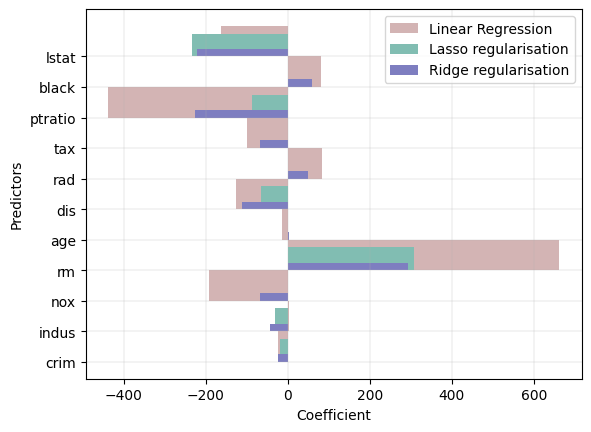

In [13]:
# Helper code below to visualise your results

plt.rcdefaults()

plt.barh(lreg_x,lreg_y,1.0, align='edge',color="#D3B4B4", label="Linear Regression")
plt.barh(lasso_x,lasso_y,0.75 ,align='edge',color="#81BDB2",label = "Lasso regularisation")
plt.barh(ridge_x,ridge_y,0.25 ,align='edge',color="#7E7EC0", label="Ridge regularisation")
plt.grid(linewidth=0.2)
plt.xlabel("Coefficient")
plt.ylabel("Predictors")
plt.legend(loc='best')
plt.show()